In [196]:
import pandas as pd
import matplotlib
import seaborn as sns
import numpy as np
pd.set_option('display.max_colwidth', -1)

In [197]:
trainDF = pd.read_csv('data/train.csv')

# Voy a abrir el csv y buscar duplicados, sospecho que los links no ayudan.

In [198]:
trainDFNoModifications = pd.read_csv("data/train.csv")
trainDF = trainDFNoModifications.copy()
trainDF = trainDF.drop_duplicates(subset=["text"])
len(trainDF)

7503

In [199]:
def removeLinkAndHashtags(listOfWords):
    listOfWords = filter(lambda x: not x.startswith("http") and not x.startswith("#"), listOfWords)
    return " ".join(listOfWords)

In [200]:
trainDFNoDuplicates = trainDF.copy()
trainDFNoDuplicates["text"] = trainDFNoDuplicates["text"].map(lambda x: removeLinkAndHashtags(x.split()))

In [201]:
trainDFNoDuplicates = trainDFNoDuplicates.drop_duplicates(subset=["text"])
len(trainDFNoDuplicates)

6893

## Habia algunos duplicados, decidí borrarlos

In [202]:
trainDF = trainDFNoDuplicates

In [203]:
trainDF.loc[trainDF.keyword.notnull()]

,id,keyword,location,text,target
31,48,ablaze,Birmingham,@bbcmtd Wholesale Markets ablaze,1
32,49,ablaze,Est. September 2012 - Bristol,We always try to bring the heavy.,0
33,50,ablaze,AFRICA,Breaking news:Nigeria flag set ablaze in Aba.,1
34,52,ablaze,"Philadelphia, PA",Crying out for more! Set me ablaze,0
35,53,ablaze,"London, UK",On plus side LOOK AT THE SKY LAST NIGHT IT WAS ABLAZE,0
36,54,ablaze,Pretoria,@PhDSquares they've built so much hype around new acquisitions but I doubt they will set the EPL ablaze this season.,0
37,55,ablaze,World Wide!!,INEC Office in Abia Set Ablaze -,1
38,56,ablaze,NaN,Barbados JAMAICA ÛÒ Two cars set ablaze: SANTA CRUZ ÛÓ Head of the St Elizabeth Police Superintende...,1
39,57,ablaze,Paranaque City,Ablaze for you Lord :D,0
40,59,ablaze,Live On Webcam,Check these out:,0


# TASK-1.0 Mostrar si hay keyboards que tienen más chances de estar en un twit real. (Con al menos uno me alcanza)

In [204]:
chancesOfKeywordBeingRealDF = trainDF.groupby("keyword").agg({"target": ["count", "sum"]})
chancesOfKeywordBeingRealDF["percentage"] = chancesOfKeywordBeingRealDF["target"]["sum"] / chancesOfKeywordBeingRealDF["target"]["count"]
chancesOfKeywordBeingRealDF.columns = ['count', 'sum', 'chances of being real']
chancesOfKeywordBeingRealDF = chancesOfKeywordBeingRealDF.reset_index()
chancesOfKeywordBeingRealDF

,keyword,count,sum,chances of being real
0,ablaze,35,13,0.371429
1,accident,35,24,0.685714
2,aftershock,27,0,0.000000
3,airplane%20accident,32,27,0.843750
4,ambulance,23,8,0.347826
5,annihilated,32,9,0.281250
6,annihilation,21,6,0.285714
7,apocalypse,32,9,0.281250
8,armageddon,42,5,0.119048
9,army,31,5,0.161290


### Quiero ver min, max y mean de sum y chances of being real

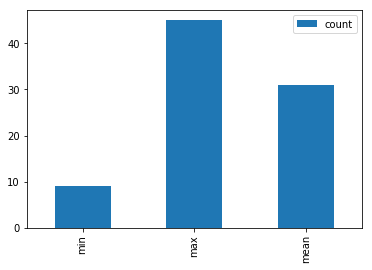

In [205]:
chancesOfKeywordBeingRealDF.agg({"count": ["min", "max", "mean"]}).plot.bar()

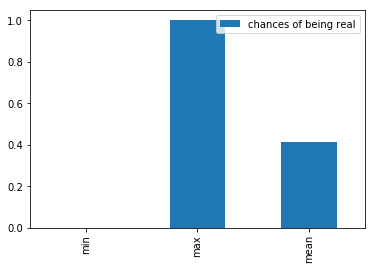

In [206]:
chancesOfKeywordBeingRealDF.agg({"chances of being real": ["min", "max", "mean"]}).plot.bar()

### Elimino las keywords con cantidad de apariciones: < 15

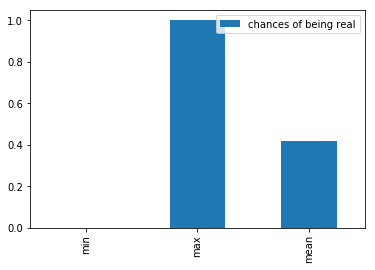

In [207]:
chancesOfKeywordBeingRealDF.loc[chancesOfKeywordBeingRealDF["count"] > 15].agg({"chances of being real": ["min", "max", "mean"]}).plot.bar()

### Elimino las keywords con cantidad de apariciones: < 25

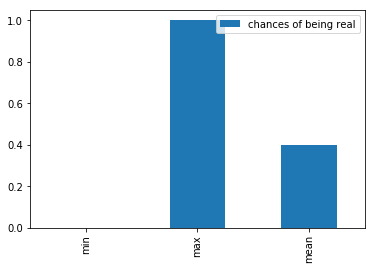

In [208]:
chancesOfKeywordBeingRealDF.loc[chancesOfKeywordBeingRealDF["count"] > 25].agg({"chances of being real": ["min", "max", "mean"]}).plot.bar()

### Elimino las keywords con cantidad de apariciones: < 35

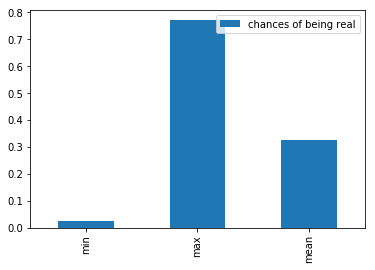

In [209]:
chancesOfKeywordBeingRealDF.loc[chancesOfKeywordBeingRealDF["count"] > 35].agg({"chances of being real": ["min", "max", "mean"]}).plot.bar()

### Elimino las keywords con cantidad de apariciones: < 40

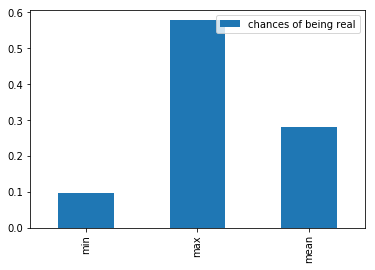

In [210]:
chancesOfKeywordBeingRealDF.loc[chancesOfKeywordBeingRealDF["count"] > 40].agg({"chances of being real": ["min", "max", "mean"]}).plot.bar()

### Elimino las keywords con cantidad de apariciones: > 15

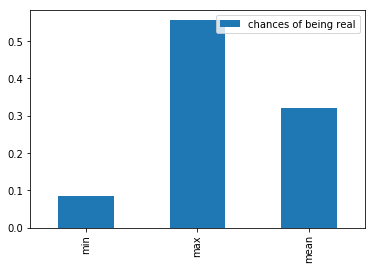

In [211]:
chancesOfKeywordBeingRealDF.loc[chancesOfKeywordBeingRealDF["count"] < 15].agg({"chances of being real": ["min", "max", "mean"]}).plot.bar()

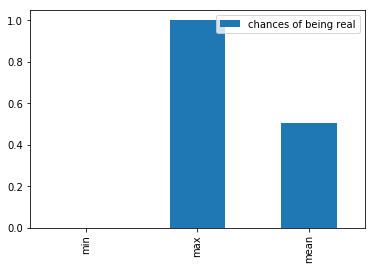

In [212]:
chancesOfKeywordBeingRealDF.loc[chancesOfKeywordBeingRealDF["count"] < 25].agg({"chances of being real": ["min", "max", "mean"]}).plot.bar()

### Hay poca cantidad de keywords con menos de 15 apariciones o más de 35

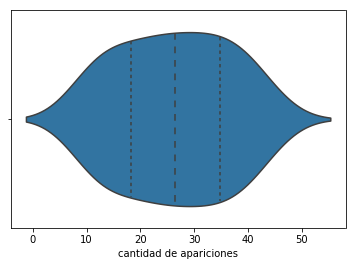

In [213]:
countRoundedViolin = chancesOfKeywordBeingRealDF.groupby("count").agg({"count": "count"})
countRoundedViolin.columns = ["cantidad de keywords"]
countRoundedViolin = countRoundedViolin.reset_index()
countRoundedViolin.columns = ["cantidad de apariciones", "cantidad de keywords"]
countRoundedViolin.head()

sns.violinplot(x=countRoundedViolin["cantidad de apariciones"], inner="quartile")

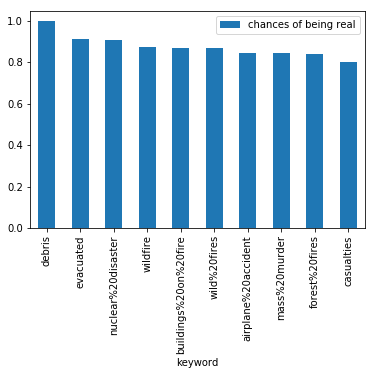

In [214]:
chancesOfKeywordBeingRealDFFiltered = chancesOfKeywordBeingRealDF.loc[lambda x : (x["count"] > 30) & (x["count"] < 40)]
chancesOfKeywordBeingRealDFFiltered.nlargest(10, "chances of being real").plot.bar(x="keyword", y="chances of being real")

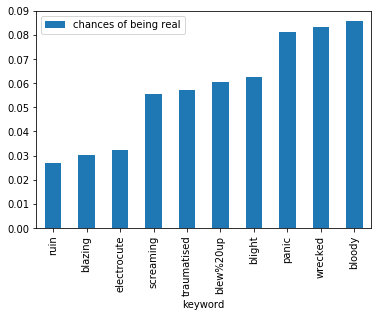

In [215]:
chancesOfKeywordBeingRealDFFiltered.nsmallest(10, "chances of being real").plot.bar(x="keyword", y="chances of being real")

## En keywords con una cantidad comparable de apariciones hay una diferencia muy grande entre las chances que hay de que sean verdaderas o no

# Task-1.1 Mostrar que relación existe entre la aparición (y cantidad) de hashtags y el target

In [216]:
hashtagsDF = trainDFNoModifications.copy()
hashtagsDF.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation orders in California",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as smoke from #wildfires pours into a school,1


In [217]:
def removeNotHashtags(listOfWords):
    listOfWords = filter(lambda x: x.startswith("#"), listOfWords)
    return listOfWords

In [218]:
hashtagsDF["text"] = hashtagsDF["text"].apply(lambda x: removeNotHashtags(x.split()))
hashtagsDF.head()

,id,keyword,location,text,target
0,1,NaN,NaN,[#earthquake],1
1,4,NaN,NaN,[],1
2,5,NaN,NaN,[],1
3,6,NaN,NaN,[#wildfires],1
4,7,NaN,NaN,"[#Alaska, #wildfires]",1


In [219]:
hashTagTargetDic = {}
def addToDic(row):
    for word in row[3]:
        if word in hashTagTargetDic:
            hashTagTargetDic[word] = hashTagTargetDic[word] + [row[4]]
        else:
            hashTagTargetDic[word] = [row[4]]
    return row

In [220]:
hashtagsDF.apply(addToDic, axis=1)

,id,keyword,location,text,target
0,1,NaN,NaN,[#earthquake],1
1,4,NaN,NaN,[],1
2,5,NaN,NaN,[],1
3,6,NaN,NaN,[#wildfires],1
4,7,NaN,NaN,"[#Alaska, #wildfires]",1
5,8,NaN,NaN,"[#RockyFire, #CAfire, #wildfires]",1
6,10,NaN,NaN,"[#flood, #disaster]",1
7,13,NaN,NaN,[],1
8,14,NaN,NaN,[],1
9,15,NaN,NaN,[],1


In [221]:
hashTagTargetDic

{'#Love': [0, 0],
 '#RAmag.': [0, 0, 0, 0],
 '#EverydayNaija': [1],
 '#gadgets': [1, 0],
 '#Entertainment': [0],
 '#OTRAMETLIFE': [0, 0, 0, 1],
 '#Medinah': [1],
 '#okwx': [1, 1, 1, 1, 1, 1],
 '#Benediction': [0],
 '#casualties': [0],
 '#WholesaleEnt': [0],
 '#trollingtilMeekdiss': [0],
 '#Live': [0],
 '#Tb': [0],
 '#world': [1, 0, 0, 1, 1, 1, 1, 1],
 '#cndpoli': [1],
 '#TS': [1, 1, 1],
 '#BREAKING:': [1, 1],
 '#TY': [0],
 '#download': [1],
 '#Niagara.Vehicles': [1],
 '#SuryaRay': [1],
 '#IranDeal.': [0],
 '#MusicAdvisory': [0],
 '#lawx': [1],
 '#EMS': [0, 1],
 '#tattoo': [1],
 '#fresno': [1],
 '#CLE': [0],
 '#vaginaorcake': [1],
 '#Metepec': [1],
 '#bookmobile': [0],
 '#Clip!': [0],
 '#UFO4UBlogEurope': [1],
 '#Halifax': [0],
 '#Wildfire': [1, 1, 1],
 '#yycfringe': [1],
 '#SummerFate': [0, 0, 0, 0],
 '#Megaquake': [1],
 '#psychrewatch': [0],
 '#icelandreview': [1],
 '#askH3cz': [0],
 '#BishopFred': [0],
 '#Japanjapan': [1],
 '#AllLivesMatter': [0, 0],
 '#FX': [0],
 '#FR': [1],
 '#Modi

In [222]:
hashTagTargetDicDF = pd.DataFrame(list(hashTagTargetDic.items()),columns = ['keyword','targets']) 
hashTagTargetDicDF.head()

,keyword,targets
0,#Love,"[0, 0]"
1,#RAmag.,"[0, 0, 0, 0]"
2,#EverydayNaija,[1]
3,#gadgets,"[1, 0]"
4,#Entertainment,[0]


In [223]:
hashTagTargetDicDF["apariciones"] = hashTagTargetDicDF["targets"].map(lambda x: len(x))
hashTagTargetDicDF.head()

,keyword,targets,apariciones
0,#Love,"[0, 0]",2
1,#RAmag.,"[0, 0, 0, 0]",4
2,#EverydayNaija,[1],1
3,#gadgets,"[1, 0]",2
4,#Entertainment,[0],1


In [224]:
hashTagTargetDicDF["verdaderos"] = hashTagTargetDicDF["targets"].map(lambda x: sum(x))
hashTagTargetDicDF.head()

,keyword,targets,apariciones,verdaderos
0,#Love,"[0, 0]",2,0
1,#RAmag.,"[0, 0, 0, 0]",4,0
2,#EverydayNaija,[1],1,1
3,#gadgets,"[1, 0]",2,1
4,#Entertainment,[0],1,0


In [225]:
hashTagTargetDicDF["chances de ser verdadero"] = hashTagTargetDicDF["verdaderos"] / hashTagTargetDicDF["apariciones"] * 100
hashTagTargetDicDF["chances de ser verdadero"] = hashTagTargetDicDF["chances de ser verdadero"].map(lambda x : 0 if( x == np.inf) else x)
hashTagTargetDicDF.head()

,keyword,targets,apariciones,verdaderos,chances de ser verdadero
0,#Love,"[0, 0]",2,0,0.0
1,#RAmag.,"[0, 0, 0, 0]",4,0,0.0
2,#EverydayNaija,[1],1,1,100.0
3,#gadgets,"[1, 0]",2,1,50.0
4,#Entertainment,[0],1,0,0.0


In [226]:
hashTagTargetDicDF.nlargest(10, "apariciones")

,keyword,targets,apariciones,verdaderos,chances de ser verdadero
345,#news,"[1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0]",36,21,58.333333
736,#News,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1]",36,31,86.111111
90,#best,"[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0]",30,13,43.333333
380,#prebreak,"[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0]",30,13,43.333333
1942,#hot,"[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0]",30,13,43.333333
2076,#???,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",23,23,100.000000
1542,#??,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1]",20,19,95.000000
1917,#Hiroshima,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",20,20,100.000000
1062,#GBBO,"[0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0]",16,4,25.000000
551,#terrorism,"[1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1]",11,8,72.727273


### Voy a filtrar los que tengan menos de 5 apariciones

In [243]:
hashTagTargetDicDFFiltered = hashTagTargetDicDF.loc[hashTagTargetDicDF["apariciones"] > 10]

In [244]:
hashTagTargetDicDFFiltered

,keyword,targets,apariciones,verdaderos,chances de ser verdadero
90,#best,"[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0]",30,13,43.333333
345,#news,"[1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0]",36,21,58.333333
380,#prebreak,"[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0]",30,13,43.333333
551,#terrorism,"[1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1]",11,8,72.727273
736,#News,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1]",36,31,86.111111
1062,#GBBO,"[0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0]",16,4,25.000000
1252,#ISIS,"[1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1]",11,8,72.727273
1542,#??,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1]",20,19,95.000000
1917,#Hiroshima,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",20,20,100.000000
1942,#hot,"[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0]",30,13,43.333333


In [245]:
hashTagTargetDicDFFiltered.nsmallest(10, "apariciones")

,keyword,targets,apariciones,verdaderos,chances de ser verdadero
551,#terrorism,"[1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1]",11,8,72.727273
1252,#ISIS,"[1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1]",11,8,72.727273
1062,#GBBO,"[0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0]",16,4,25.000000
1542,#??,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1]",20,19,95.000000
1917,#Hiroshima,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",20,20,100.000000
2076,#???,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]",23,23,100.000000
90,#best,"[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0]",30,13,43.333333
380,#prebreak,"[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0]",30,13,43.333333
1942,#hot,"[0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0]",30,13,43.333333
345,#news,"[1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0]",36,21,58.333333


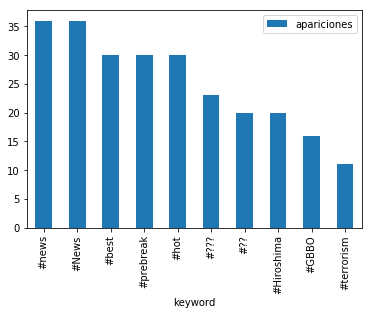

In [246]:
hashTagTargetDicDFFiltered.nlargest(10, "apariciones").plot.bar(x = "keyword", y = "apariciones")

# Hay pocos hashtags con suficientes repeticiones, pero si se puede ver una diferencia.